## Define Plane Class. Read coordinates from the text

In [20]:
class Plane:
    def __init__(self, color, text):
        self.color = color
        self.X = list()
        self.Y = list()
        for line in text:
            x, y = line.split()
            self.X.append(float(x))
            self.Y.append(1600 - float(y))
            
    def scale(self, x_mn, y_mn, r_factor):
        self.X = [int((x-x_mn)/r_factor) for x in self.X]
        self.Y = [int((y-y_mn)/r_factor) for y in self.Y]

with open('Blue Plane Coordinates_raw.txt', 'r') as f:
    text = f.readlines()
    b_full = Plane("Blue", text)
    
with open('blue_last.txt', 'r') as f:
    text = f.readlines()
    blue = Plane("Blue", text)
        
with open('Pink Plane Coordinates_raw.txt', 'r') as f:
    text = f.readlines()
    p_full = Plane("Pink", text)
    
with open('pink_last.txt', 'r') as f:
    text = f.readlines()
    pink = Plane("Pink", text)
    
planes = [blue, pink]

In [2]:
# # Scaling
# # x_max = max(max(blue.X), max(pink.X))
# x_min = min(min(blue.X), min(pink.X))

# # y_max = max(max(blue.Y), max(pink.Y))
# y_min = min(min(blue.Y), min(pink.Y))

# for plane in planes:
#     plane.scale(x_min, y_min, 20)
    
# print(blue.X)

In [45]:
from scipy.interpolate import CubicSpline, UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = blue.X
y = blue.Y

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(934, 1700, 1000)
y_new = f(x_new)

g = CubicSpline(pink.X, pink.Y, bc_type='natural')
x_n_p = np.linspace(1290, 1500, 1000)
y_n_p = g(x_n_p)

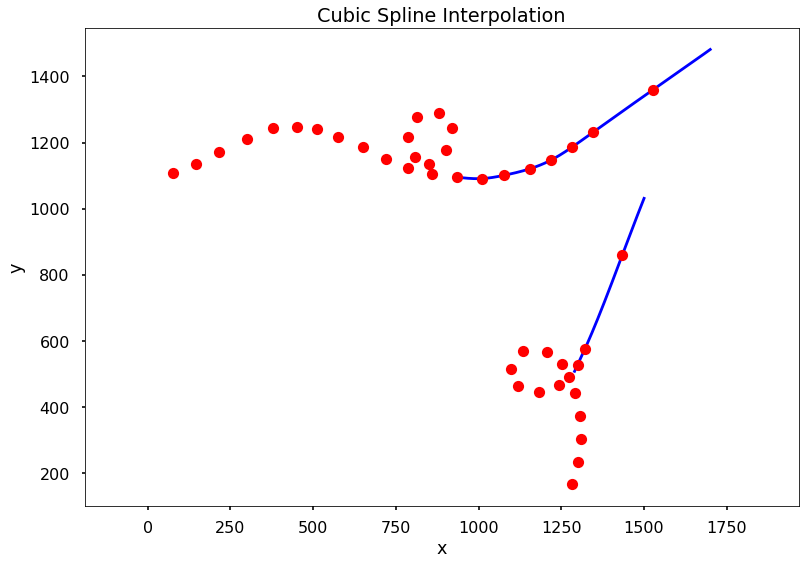

In [47]:
axes=plt.gca()
axes.axis('equal')
plt.plot(x_new, y_new, 'b')
plt.plot(x_n_p, y_n_p, 'b')
plt.plot(b_full.X, b_full.Y, 'ro')
plt.plot(p_full.X, p_full.Y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [31]:
print(f.c)

[[ 9.09979597e-06 -8.73306946e-06  3.58765246e-06  4.41239298e-06
  -6.81736823e-06 -4.12852917e-06  2.30535102e-07]
 [ 1.08420217e-19  2.05291397e-03  3.00186932e-04  1.13001095e-03
   1.97719040e-03  6.90753014e-04 -1.25457203e-04]
 [-1.04651200e-01  4.97279311e-02  2.07150381e-01  3.17418638e-01
   5.16279524e-01  6.84093164e-01  7.21346158e-01]
 [ 1.09510000e+03  1.09110000e+03  1.10100000e+03  1.12040000e+03
   1.14650000e+03  1.18510000e+03  1.23200000e+03]]
